# Utils

In [47]:
import os
from scipy.io import loadmat
import shutil
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, surface, plotting
import nibabel as nib
from nilearn.image import new_img_like
from matplotlib import ticker

Some info about the files

In [48]:
def print_tree(start_path, prefix=''):
    for i, item in enumerate(sorted(os.listdir(start_path))):
        path = os.path.join(start_path, item)
        connector = "└── " if i == len(os.listdir(start_path)) - 1 else "├── "
        print(prefix + connector + item)
        if os.path.isdir(path):
            extension = "    " if i == len(os.listdir(start_path)) - 1 else "│   "
            print_tree(path, prefix + extension)

In [49]:
print_tree('/Users/emmatosato/Documents/PhD/RHOSTS/Sample_results/')

├── edges_projection_T0_1200_N50.hd5
├── results_T0_1200_N50.txt
└── trial_gen
    ├── generators__0.pck
    ├── generators__1.pck
    ├── generators__2.pck
    ├── generators__3.pck
    └── generators__4.pck


# Example Input and Output Data

In [ ]:
path_example_input = '/Users/emmatosato/Documents/PhD/RHOSTS/Kaneko_CLM/trial_N50_T240_r175_eps012_008_03_0068_005.txt_kaneko'
path_example_output = '/Users/emmatosato/Documents/PhD/RHOSTS/Sample_results/results_T0_1200_N50.txt'

In [51]:
example_input_data = np.loadtxt(path_example_input)
print(example_input_data.shape)

(1205, 51)


In [52]:
example_out_data = np.loadtxt(path_example_output)
print(example_out_data.shape)

(1200, 7)


# Brain

## Input Data

One subject

In [63]:
print_tree("/Users/emmatosato/Documents/PhD/Data/All_data_MTS/HCP_data/HCP_TS/100307")

├── .DS_Store
├── rfMRI_REST1_LR
│   ├── .DS_Store
│   └── Schaefer100
│       └── TS_Schaefer100S_gsr_bp_z.mat
├── rfMRI_REST1_RL
│   ├── .DS_Store
│   └── Schaefer100
│       └── TS_Schaefer100S_gsr_bp_z.mat
├── rfMRI_REST2_LR
│   └── Schaefer100
│       └── TS_Schaefer100S_gsr_bp_z.mat
└── rfMRI_REST2_RL
    └── Schaefer100
        └── TS_Schaefer100S_gsr_bp_z.mat


In [64]:
source_path = "/Users/emmatosato/Documents/PhD/Data/All_data_MTS/HCP_data/HCP_TS/100307/rfMRI_REST1_LR/Schaefer100/TS_Schaefer100S_gsr_bp_z.mat"

path_sub1_input = '/Users/emmatosato/Documents/PhD/RHOSTS/input/subject1_left.txt'

In [65]:
# Load the data from the .mat file
data_left = loadmat(source_path)

# Some data informations
print(data_left.keys())
print(type(data_left['TS']))
print(data_left['TS'].shape)
TS = data_left['TS']

dict_keys(['__header__', '__version__', '__globals__', 'TS'])
<class 'numpy.ndarray'>
(119, 1200)


In [66]:
TS[:5]

array([[ 0.42840174,  1.0687296 ,  1.618835  , ..., -2.050148  ,
        -1.9216338 , -1.4539335 ],
       [-0.51615393, -1.1225122 , -1.5559545 , ...,  0.1071309 ,
        -0.20474166, -0.31939682],
       [-0.11200012, -0.7217072 , -1.3227609 , ...,  1.3014971 ,
         0.9631817 ,  0.61945456],
       [ 0.9009101 ,  1.0392194 ,  0.98051906, ..., -1.0508194 ,
        -1.0570711 , -1.0428898 ],
       [-0.6016095 , -1.2583206 , -1.6848183 , ...,  1.1024731 ,
         0.7963203 ,  0.4396999 ]], dtype=float32)

In [67]:
TS.shape

(119, 1200)

- 119 rows: Representing 119 brain regions of interest (ROIs).

- 1200 columns: Representing time points or temporal samples.


In [68]:
# Transpose the data to have time points as rows and ROIs as columns
TS = TS.T
print(TS.shape)

# Save the transposed data
np.savetxt('../input/subject1_left.txt', TS, fmt='%f')

(1200, 119)


Quick check

In [69]:
np.loadtxt(path_sub1_input).shape

(1200, 119)

## Output Data

In [17]:
output_data = np.loadtxt(path_sub1_output)
print(output_data.shape)

(1200, 7)


### Hyper-Complexity

Sort the output data by time and plot the Hyper-Complexity

In [18]:
output_data_sort = output_data[np.argsort(output_data[:, 0])]

Text(0, 0.5, 'Hyper-Complexity')

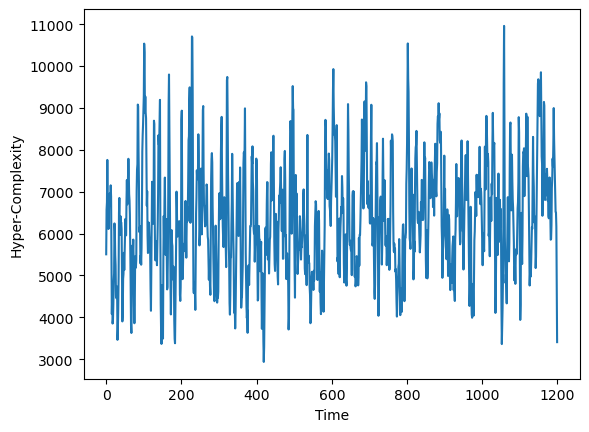

In [19]:
plt.plot(output_data_sort[:,0],output_data_sort[:,1])
plt.xlabel("Time")
plt.ylabel("Hyper-Complexity")

### Projected violating triangles

In [61]:
path_sub1_output = ('/Users/emmatosato/Documents/PhD/RHOSTS/output/subject1_left_results.txt')
path_sub1_output_proj = '/Users/emmatosato/Documents/PhD/RHOSTS/Sample_results/edges_projection_sub1_left_1200.hd5'

In [62]:
edge_sub1 = h5py.File(path_sub1_output_proj, "r")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/emmatosato/Documents/PhD/RHOSTS/Sample_results/edges_projection_sub1_left_1200.hd5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [46]:
edge_sub1["0"][:]

array([[9.30000000e+01, 1.08000000e+02, 1.26615135e+02, 5.30000000e+01],
       [9.30000000e+01, 1.17000000e+02, 6.19679451e+01, 5.00000000e+01],
       [1.08000000e+02, 1.17000000e+02, 1.31365463e+02, 5.50000000e+01],
       ...,
       [3.40000000e+01, 1.16000000e+02, 1.04387067e-01, 2.00000000e+00],
       [7.60000000e+01, 1.12000000e+02, 5.59808835e-02, 1.00000000e+00],
       [7.20000000e+01, 1.12000000e+02, 1.99358106e-01, 5.00000000e+00]],
      dtype=float32)

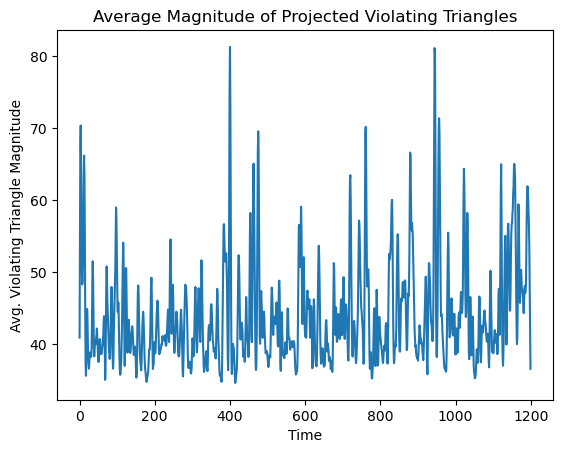

In [43]:
# Extract average edge magnitude per frame
avg_magnitudes = []
time_points = []

for time_key in edge_sub1.keys():
    edge_weights = edge_sub1[time_key][:]
    avg_magnitudes.append(np.mean(edge_weights))
    time_points.append(int(time_key))  # convert from string to int

# Sort by time
sorted_indices = np.argsort(time_points)
time_points = np.array(time_points)[sorted_indices]
avg_magnitudes = np.array(avg_magnitudes)[sorted_indices]

# Plot
plt.plot(time_points, avg_magnitudes)
plt.xlabel("Time")
plt.ylabel("Avg. Violating Triangle Magnitude")
plt.title("Average Magnitude of Projected Violating Triangles")
plt.show()

In [23]:
edge_sub1.close()

### Homological Scaffold

In [24]:
sys.path.append('../High_order_TS_with_scaffold/')  # add parent directory to import the module Holes
import Holes as ho
import pickle as pk
import networkx as nx

Defines a function to load the scaffold graph

In [25]:
def load_scaffold_singletime(filepath_scaffold, single_time, ScafH=nx.Graph(), hom_group=1):
    f = open(filepath_scaffold + 'generators__{0}.pck'.format(single_time), 'rb')

    gen = pk.load(f)

    edges = []
    for c in gen[hom_group]:
        for e in c.cycles():
            #print(e)
            u, v = int(e[0]), int(e[1])
            if ScafH.has_edge(u, v):
                ScafH[u][v]['weight'] += c.persistence_interval()
            else:
                ScafH.add_edge(u, v, weight=c.persistence_interval())
    f.close()
    return (ScafH)



In [26]:
ScafH = load_scaffold_singletime(
    '../Sample_results/scaffold_gen/',
    single_time='0',
    ScafH=nx.Graph(),
    hom_group=1
)

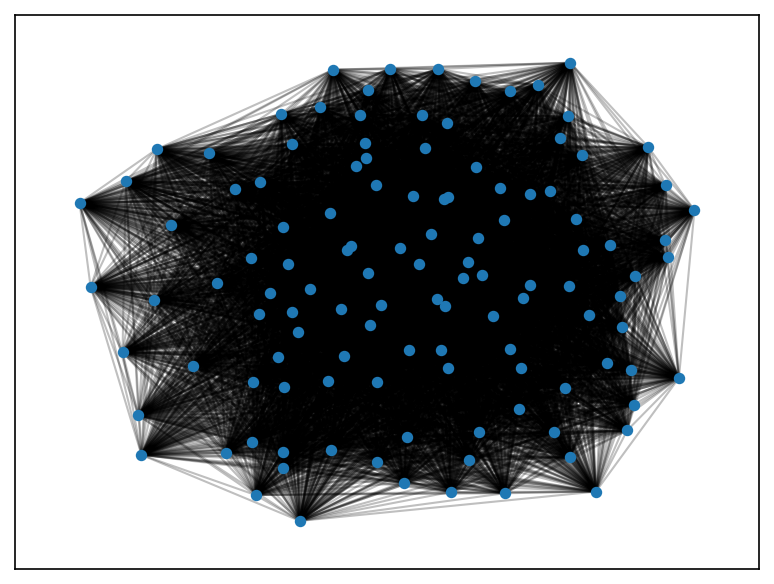

In [27]:
plt.figure(dpi=150)
layout = nx.drawing.layout.spring_layout(ScafH)
nx.draw_networkx_edges(ScafH, pos=layout,alpha=0.25)
nx.draw_networkx_nodes(ScafH, pos=layout,node_size=20)

## Plotting the nodal strength

To compute the nodal strengths, from the article:
> Similarly, we define the nodal strength $w_i$ of node i as the sum of weights of the triangles connected to node $i$ after the edge projection. In the case of the homological scaffold, since it is a weighted network, the node strength $\bar{w}_i$ of node $i$ is defined, in the classical way, as the sum of the weights of edges connected to the node $i$.
> In the case of the homological scaffold, since it is a weighted network, the node strength $\bar{w}_i$ of node $i$ is defined, in the classical way, as the sum of the weights of edges connected to the node $i$.

#### Violating triangles

In [28]:
# Edge projection of the list of violating triangles
edge_sub1 = h5py.File(path_sub1_output_proj, "r")

triangle_data = edge_sub1["0"][:]

In [29]:
# Initialize nodal strength vector (for Schaefer 100)
nodal_strength_triangles = np.zeros(100)

# Project triangle weights to nodes, ignoring nodes > 99
for triangle in triangle_data:
    i, j, k = map(int, triangle[:3])
    w = triangle[3]
    if i < 100:
        nodal_strength_triangles[i] += w
    if j < 100:
        nodal_strength_triangles[j] += w
    if k < 100:
        nodal_strength_triangles[k] += w

#### Homological scaffold

In [30]:
# Initialize a nodal strength vector of zeros for all nodes in the scaffold
num_nodes = max(ScafH.nodes()) + 1
nodal_strength_scaffold = np.zeros(num_nodes)

# Loop over all edges in the scaffold grap
for u, v, data in ScafH.edges(data=True):
    # For each edge (u,v), retrieve its weight
    weight = data['weight']

    # Add the edge weight to both nodes u and v
    nodal_strength_scaffold[u] += weight
    nodal_strength_scaffold[v] += weight

In [31]:
print("Min node index:", min(ScafH.nodes()))
print("Max node index:", max(ScafH.nodes()))

Min node index: 0
Max node index: 118


#### Plotting

For the atlas:
- Schaefer-100 parcellation
- the nodal_strength vector should have exactly 100 values = one per region

In [32]:
def plot_nodal_strength_on_surface(nodal_strength, title='Nodal Strength'):
    """
    Projects nodal strength on cortical surface using Schaefer-100 atlas and fsaverage.
    """

    # Load atlas and fsaverage
    schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=100, resolution_mm=1)
    fsaverage = datasets.fetch_surf_fsaverage()
    atlas_img = nib.load(schaefer.maps)
    atlas_data = atlas_img.get_fdata()

    # Map nodal strength into volumetric image
    output_data = np.zeros_like(atlas_data)
    for i in range(100):
        output_data[atlas_data == i + 1] = nodal_strength[i]
    output_img = new_img_like(atlas_img, output_data)

    # Project to surface
    texture_left = surface.vol_to_surf(output_img, fsaverage.pial_left)
    texture_right = surface.vol_to_surf(output_img, fsaverage.pial_right)

    # Clip upper percentile for visual clarity
    vmax_value = np.percentile(nodal_strength, 99)

    # Plot both hemispheres
    fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 4), dpi=150)

    plotting.plot_surf_stat_map(
        fsaverage.infl_left,
        stat_map=texture_left,
        bg_map=fsaverage.sulc_left,
        cmap='RdYlGn_r',
        threshold=None,
        colorbar=True,
        title='Left Hemisphere',
        vmax=vmax_value,
        axes=axes[0],
    )
    axes[0].set_title("Left Hemisphere", fontsize=10)
    cb1 = plt.gcf().axes[-1]
    cb1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/100:.2f}×10²'))

    plotting.plot_surf_stat_map(
        fsaverage.infl_right,
        stat_map=texture_right,
        bg_map=fsaverage.sulc_right,
        cmap='RdYlGn_r',
        threshold=None,
        colorbar=True,
        title='Right Hemisphere',
        vmax=vmax_value,
        axes=axes[1],
    )
    axes[1].set_title("Right Hemisphere", fontsize=10)
    cb2 = plt.gcf().axes[-1]
    cb2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/100:.2f}×10²'))

    plt.suptitle(title, y=0.92, fontsize=14)
    plt.show()


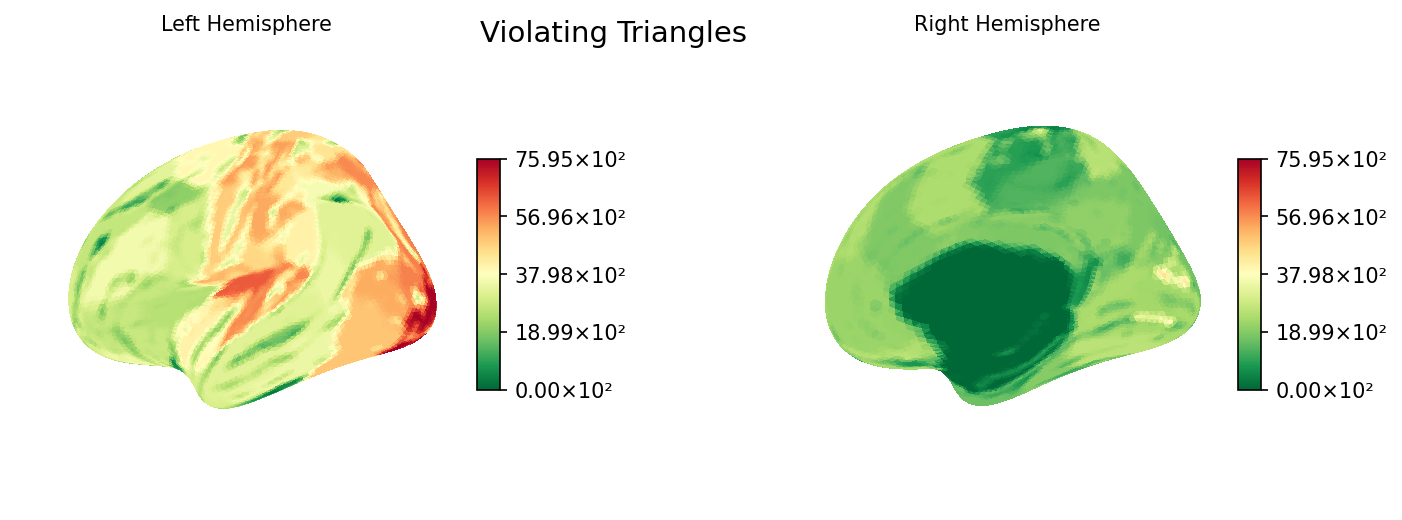

In [33]:
plot_nodal_strength_on_surface(nodal_strength_triangles, title="Violating Triangles")

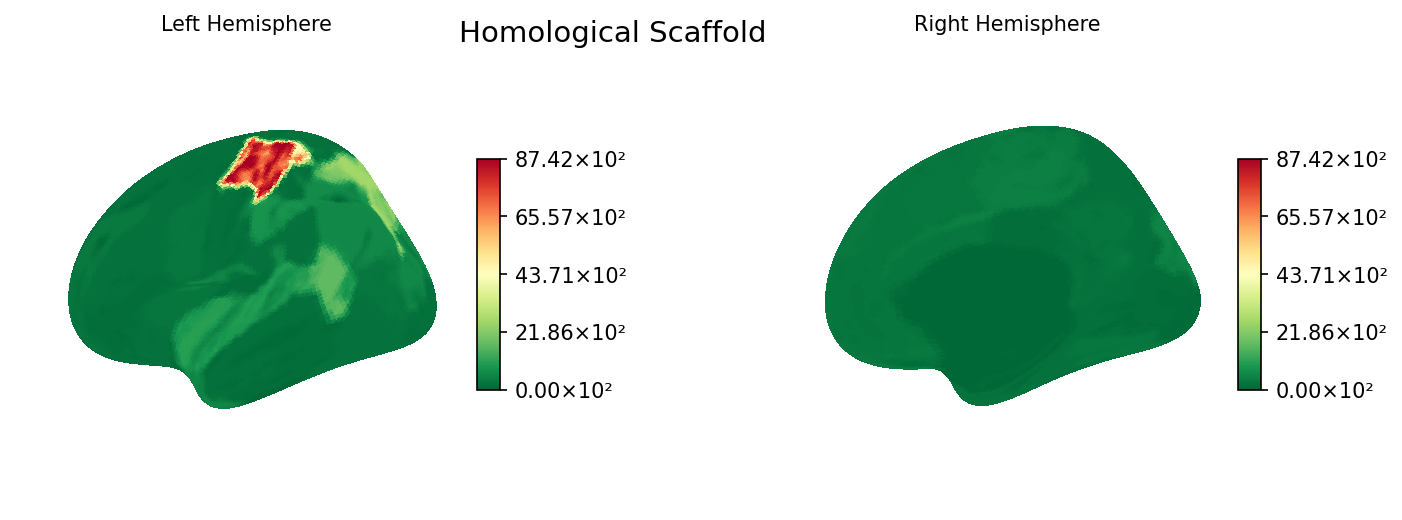

In [34]:
plot_nodal_strength_on_surface(nodal_strength_scaffold, title="Homological Scaffold")

### Triangular representation

In [35]:
# Extract FC, CT, FD columns
FC = output_data_sort[:, 2]
CT = output_data_sort[:, 3]
FD = output_data_sort[:, 4]
total = FC + CT + FD

In [36]:
# Normalize to get barycentric coordinates (they sum to 1)
f_fc = FC / total
f_ct = CT / total
f_fd = FD / total

In [37]:
def barycentric_to_cartesian(f_fc, f_ct, f_fd):
    """
    Convert barycentric coordinates to 2D triangle coordinates for plotting.
    Triangle corners:
    - FC at (0, 0)
    - FD at (1, 0)
    - CT at (0.5, sqrt(3)/2)
    """
    x = f_fd + 0.5 * f_ct
    y = (np.sqrt(3) / 2) * f_ct
    return x, y

In [38]:
x_coords, y_coords = barycentric_to_cartesian(f_fc, f_ct, f_fd)

In [39]:
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_complexity_triangle(x_coords, y_coords, label='Resting', cmap='Blues', bins=100):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot base triangle (FC, FD, CT)
    triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [0, 0]])
    ax.plot(triangle[:, 0], triangle[:, 1], 'k-', lw=1.5)
    ax.set_aspect('equal')
    ax.axis('off')

    # Add triangle labels
    ax.text(0, -0.05, 'FC', ha='center', fontsize=12)
    ax.text(1, -0.05, 'FD', ha='center', fontsize=12)
    ax.text(0.5, np.sqrt(3)/2 + 0.05, 'CT', ha='center', fontsize=12)

    # Density plot
    h = ax.hist2d(
        x_coords, y_coords, bins=bins,
        norm=colors.LogNorm(), cmap=cmap,
        range=[[0, 1], [0, np.sqrt(3)/2]], alpha=0.9
    )

    ax.set_title(f"Triangle Decomposition – {label}", fontsize=14)
    plt.show()

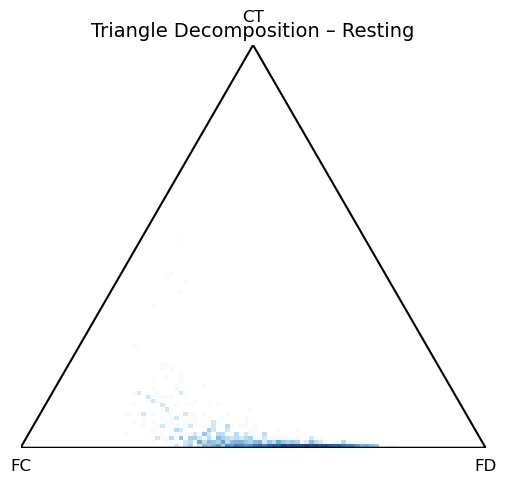

In [40]:
# Example usage
plot_complexity_triangle(x_coords, y_coords, label='Resting')